In [2]:
%matplotlib widget
import pyslim, msprime, tskit, random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, display

#load tree sequence file, recapitate

# ts = pyslim.load("/Users/alexanderwhitwam/Dropbox/university/research/space-trees/alex/memutory.trees")
ts = pyslim.load("memutory.trees") #this lets anyone who opens your ipynb load the trees =
ts = ts.recapitate(recombination_rate = 1e-8, Ne=500)
#ts = pyslim.SlimTreeSequence(msprime.mutate(ts, rate=1e-7))

In [3]:
ts

In [4]:
samps = random.sample(sorted(ts.individuals_alive_at(0)), 5)
snodes = []
for i in samps:
    snodes.append(ts.individuals()[i].nodes[0])
    snodes.append(ts.individuals()[i].nodes[1])

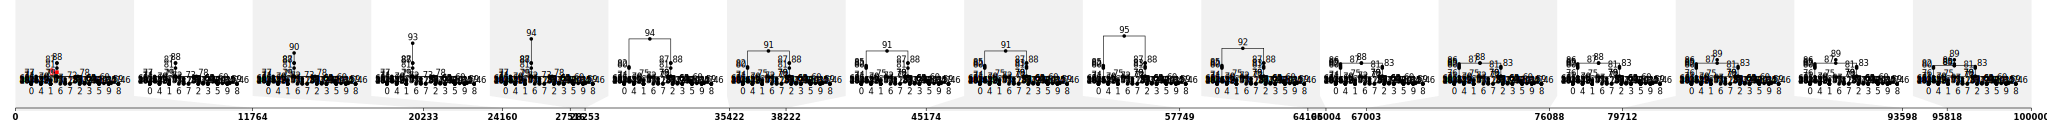

In [5]:
sts = ts.simplify(snodes, keep_unary=True)
muted = sts.at(10000)
SVG(sts.draw_svg())

In [6]:
simpns = []
for i in range(0, 5):
    for n in sts.individual(i).nodes:
        simpns.append(n)

In [7]:
def ancestral_movement(tree):
    lists, simpis, ancestors = [], [], [] #lists of xyz coordinates for each individual, 
                                          #descendant & ancestral individuals in simplified ts
    for n in simpns:
        ind = sts.node(n).individual
        if ind not in simpis:
            simpis.append(ind)
        x = [sts.individual(ind).location[0]]
        y = [sts.individual(ind).location[1]]
        z = [sts.individual(ind).time]
        while tree.parent(n) != tskit.NULL and sts.node(tree.parent(n)).time < 2000:
            n = tree.parent(n)
            indi = sts.node(n).individual
            if indi != -1:
                x.append(sts.individual(indi).location[0])
                y.append(sts.individual(indi).location[1])
                z.append(sts.individual(indi).time)
        ancestors.append(sts.node(n).individual)
        lists.append([x, y, z])

    xan, yan, zan = [], [], []
    for i in ancestors:
        xan.append(sts.individual(i).location[0])
        yan.append(sts.individual(i).location[1])
        zan.append(sts.individual(i).time)

    xde, yde, zde = [], [], []
    for i in simpis:
        xde.append(sts.individual(i).location[0])
        yde.append(sts.individual(i).location[1])
        zde.append(sts.individual(i).time)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_zlim([2000, 0])

    for i in range(len(lists)):
        ax.plot(lists[i][0], lists[i][1], lists[i][2], color="black", linewidth=0.5)

    ax.scatter3D(xan, yan, zan, color="xkcd:sky blue")
    ax.scatter3D(xde, yde, zde, color="xkcd:orange")

In [8]:
ancestral_movement(muted)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
ancestral_movement(sts.at(99999))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

looking to see which nodes have the mutation?

In [43]:
for variant in sts.variants(samples=range(sts.num_nodes), isolated_as_missing=False):
    print(variant.genotypes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
